## Jata Dil Exp looking at:
 1. Conc estimates over time
 2. Inhibit time 
 3. Proportion looking and related to proportion seeing
 


In [6]:
## start with just average conc estimate over time across all runs assume that they are all the same
## these are unclassified but shockingly clean ... maybe should have juiced the PMTs ... 
## So just going to assume all iamges are jata

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path



In [22]:
test_df = pd.read_csv("../IFCBData/dilExp/jataHighV/hablab_jata_highV/merged/D20260124T065825_IFCB124_adc_only.csv")

In [35]:
print(test_df.columns.tolist())
print(test_df["IsZeroRoi"].head(n=25))

['RoiNumber', 'ADCtime', 'RunTime', 'InhibitTime', 'InhibitTimeDiff', 'VolumeAnalyzed', 'IsZeroRoi', 'RoiHeight', 'RoiWidth', 'RoiX', 'RoiY']
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    0
14    0
15    0
16    1
17    0
18    0
19    1
20    0
21    0
22    0
23    0
24    1
Name: IsZeroRoi, dtype: int64


In [36]:
roi_df = test_df.loc[test_df["IsZeroRoi"] == 0].copy()
roi_df["roi_count"] = range(1, len(roi_df) + 1)
roi_df["roi_ml"] = roi_df["roi_count"] / roi_df["VolumeAnalyzed"]


In [51]:
print(roi_df.head())

    RoiNumber    ADCtime    RunTime  InhibitTime  InhibitTimeDiff  \
13         15  15.263129  15.286026     1.198014         0.085310   
14         16  15.378533  15.401912     1.285831         0.087817   
15         17  15.487443  15.509954     1.370343         0.084512   
17         19  15.685593  15.709687     1.541875         0.086276   
18         20  15.788486  15.810571     1.626191         0.084316   

    VolumeAnalyzed  IsZeroRoi  RoiHeight  RoiWidth  RoiX  RoiY  roi_count  \
13        0.058700          0         52        72   796   606          1   
14        0.058817          0         52        72   788   678          2   
15        0.058915          0         44        72   788   822          3   
17        0.059033          0         52        72   780   742          4   
18        0.059102          0         52        72   812   310          5   

       roi_ml  
13  17.035760  
14  34.003773  
15  50.920777  
17  67.759225  
18  84.600106  


In [54]:
roi_df["VolumeAnalyzed"] = pd.to_numeric(roi_df["VolumeAnalyzed"], errors="coerce")
roi_df["roi_count"] = pd.to_numeric(roi_df["roi_ml"], errors="coerce")

In [55]:
plt.figure()
plt.scatter(roi_df['VolumeAnalyzed'],roi_df["roi_ml"])
plt.show()

In [59]:

plt.figure()
plt.scatter(roi_df["VolumeAnalyzed"], roi_df["roi_ml"])
plt.xlabel("Volume Analyzed (mL)")
plt.ylabel("ROI Count")
plt.title("ROI Count vs Volume Analyzed")
plt.savefig("../Figs/test.png")
plt.show()


In [52]:
data_dir = Path("../IFCBData/dilExp/jataLowV/hablab_jata_lowV/merged/IFCB149/")

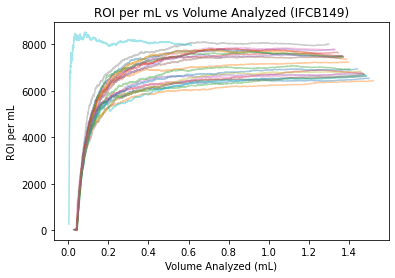

<Figure size 1500x900 with 0 Axes>

In [58]:


plt.figure()

for csv_file in data_dir.glob("*.csv"):
    df = pd.read_csv(csv_file)

    # --- subset & copy ---
    if "IsZeroRoi" not in df.columns:
        continue  # skip files that don't match schema

    df = df.loc[df["IsZeroRoi"] == 0].copy()

    if df.empty:
        continue

    # --- ensure ordering ---
    df = df.sort_values("VolumeAnalyzed")

    # --- create counter ---
    df["roi_count"] = range(1, len(df) + 1)

    # --- compute roi/ml ---
    df["roi_ml"] = df["roi_count"] / df["VolumeAnalyzed"]

    # --- plot ---
    plt.plot(
        df["VolumeAnalyzed"],
        df["roi_ml"],
        alpha=0.4
    )

plt.xlabel("Volume Analyzed (mL)")
plt.ylabel("ROI per mL")
plt.title("ROI per mL vs Volume Analyzed (IFCB149)")
plt.figure(figsize=(10,6),dpi=150)
plt.savefig("../Figs/IFCB149LowVConc.png")
plt.show()

In [56]:
## Try to figure out which file has 4 ml volume Analyzed

max_volume = -float("inf")
max_file = None

for csv_file in data_dir.glob("*.csv"):
    df = pd.read_csv(csv_file)

    if "VolumeAnalyzed" not in df.columns:
        continue

    file_max = df["VolumeAnalyzed"].max()

    if pd.isna(file_max):
        continue

    if file_max > max_volume:
        max_volume = file_max
        max_file = csv_file.name

print("File with largest VolumeAnalyzed:")
print(max_file)
print("Max VolumeAnalyzed:", max_volume)

File with largest VolumeAnalyzed:
D20260124T022904_IFCB149_adc_only.csv
Max VolumeAnalyzed: 1.5200633680555569


In [19]:
testdf=pd.read_csv("../IFCBData/dilExp/jataLowV/hablab_jata_lowV/merged/IFCB124/D20260124T211717_IFCB124_adc_only.csv")

In [21]:
print(testdf.tail(n=5))

      RoiNumber      ADCtime      RunTime  InhibitTime  InhibitTimeDiff  \
9980       9982  1200.343219  1200.391667   856.799583         0.083542   
9981       9983  1200.550477  1200.600000   856.885208         0.085625   
9982       9984  1200.658890  1200.711111   856.973681         0.088472   
9983       9985  1200.844497  1200.914583   857.042847         0.069167   
9984       9986  1200.911410  1200.959028   857.053681         0.010833   

      VolumeAnalyzed  IsZeroRoi  RoiHeight  RoiWidth  RoiX  RoiY  
9980        1.431634          1          0         0     0     0  
9981        1.432145          1          0         0     0     0  
9982        1.432239          1          0         0     0     0  
9983        1.432799          1          0         0     0     0  
9984        1.432939          1          0         0     0     0  


In [29]:
print(testdf.tail())

      RoiNumber      ADCtime      RunTime  InhibitTime  InhibitTimeDiff  \
9980       9982  1200.343219  1200.391667   856.799583         0.083542   
9981       9983  1200.550477  1200.600000   856.885208         0.085625   
9982       9984  1200.658890  1200.711111   856.973681         0.088472   
9983       9985  1200.844497  1200.914583   857.042847         0.069167   
9984       9986  1200.911410  1200.959028   857.053681         0.010833   

      VolumeAnalyzed  IsZeroRoi  RoiHeight  RoiWidth  RoiX  RoiY  
9980        1.431634          1          0         0     0     0  
9981        1.432145          1          0         0     0     0  
9982        1.432239          1          0         0     0     0  
9983        1.432799          1          0         0     0     0  
9984        1.432939          1          0         0     0     0  


In [27]:
idx = testdf["VolumeAnalyzed"].idxmax()
max_row = testdf.loc[idx]

In [30]:
print(testdf.loc[idx-5:idx+5])

      RoiNumber      ADCtime      RunTime  InhibitTime  InhibitTimeDiff  \
9163       9165  1084.674170  1084.721250   785.839861         0.085208   
9164       9166  1084.770910  1084.818750   785.926528         0.086667   
9165       9167  1084.881982  1084.929236   786.012153         0.085625   
9166       9168  1084.985119  1085.031597   786.097708         0.085556   
9167       9169  1085.080875  1085.126042   786.180486         0.082778   
9168       9170  1085.306242  1085.353472    78.584063         0.000000   
9169       9171  1085.424979  1085.472153   786.352639       707.768576   
9170       9172  1085.523475  1085.572431   786.440417         0.087778   
9171       9173  1085.620391  1085.667847   786.526319         0.085903   
9172       9174  1085.720532  1085.766806   786.610139         0.083819   
9173       9175  1085.819588  1085.867986   786.696736         0.086597   

      VolumeAnalyzed  IsZeroRoi  RoiHeight  RoiWidth  RoiX  RoiY  
9163        1.245339          0 

In [31]:
## THIS IS very strange not sure what is causing this I might delete all data and redownload because there is no obvious place where this issue would happen in the code and the raw data looks okay

In [59]:

results = []  # collect per-file summaries

for csv_file in data_dir.glob("*.csv"):
    df = pd.read_csv(csv_file)

    if "IsZeroRoi" not in df.columns:
        continue

    # --- subset & copy ---
    df = df.loc[df["IsZeroRoi"] == 0].copy()
    if df.empty:
        continue

    # --- ensure ordering ---
    df = df.sort_values("VolumeAnalyzed")

    # --- counter & roi/ml ---
    df["roi_count"] = range(1, len(df) + 1)
    df["roi_ml"] = df["roi_count"] / df["VolumeAnalyzed"]

    # --- volume window ---
    window = df.loc[
        (df["VolumeAnalyzed"] >= 0.5) &
        (df["VolumeAnalyzed"] <= 1)
    ]

    if window.empty:
        avg_roi_ml = float("nan")
    else:
        avg_roi_ml = window["roi_ml"].mean()

    # --- store result ---
    results.append({
        "file": csv_file.name,
        "avg_roi_ml": avg_roi_ml
    })

# --- final summary dataframe ---
avg_df = pd.DataFrame(results)

In [62]:
print(avg_df.head(n=6))

                                    file   avg_roi_ml     datetime_str  \
0  D20260124T014235_IFCB149_adc_only.csv  6364.255171  20260124T014235   
1  D20260124T022904_IFCB149_adc_only.csv  6123.301286  20260124T022904   
2  D20260124T031533_IFCB149_adc_only.csv  6297.170750  20260124T031533   
3  D20260124T040202_IFCB149_adc_only.csv  6521.681549  20260124T040202   
4  D20260124T044831_IFCB149_adc_only.csv  6651.264008  20260124T044831   
5  D20260124T053500_IFCB149_adc_only.csv  6454.233841  20260124T053500   

             datetime  
0 2026-01-24 01:42:35  
1 2026-01-24 02:29:04  
2 2026-01-24 03:15:33  
3 2026-01-24 04:02:02  
4 2026-01-24 04:48:31  
5 2026-01-24 05:35:00  


In [61]:
## splitting out datetime 

avg_df["datetime_str"] = (
    avg_df["file"]
    .str.extract(r"D(\d{8}T\d{6})")
)
avg_df["datetime"] = pd.to_datetime(
    avg_df["datetime_str"],
    format="%Y%m%dT%H%M%S"
)


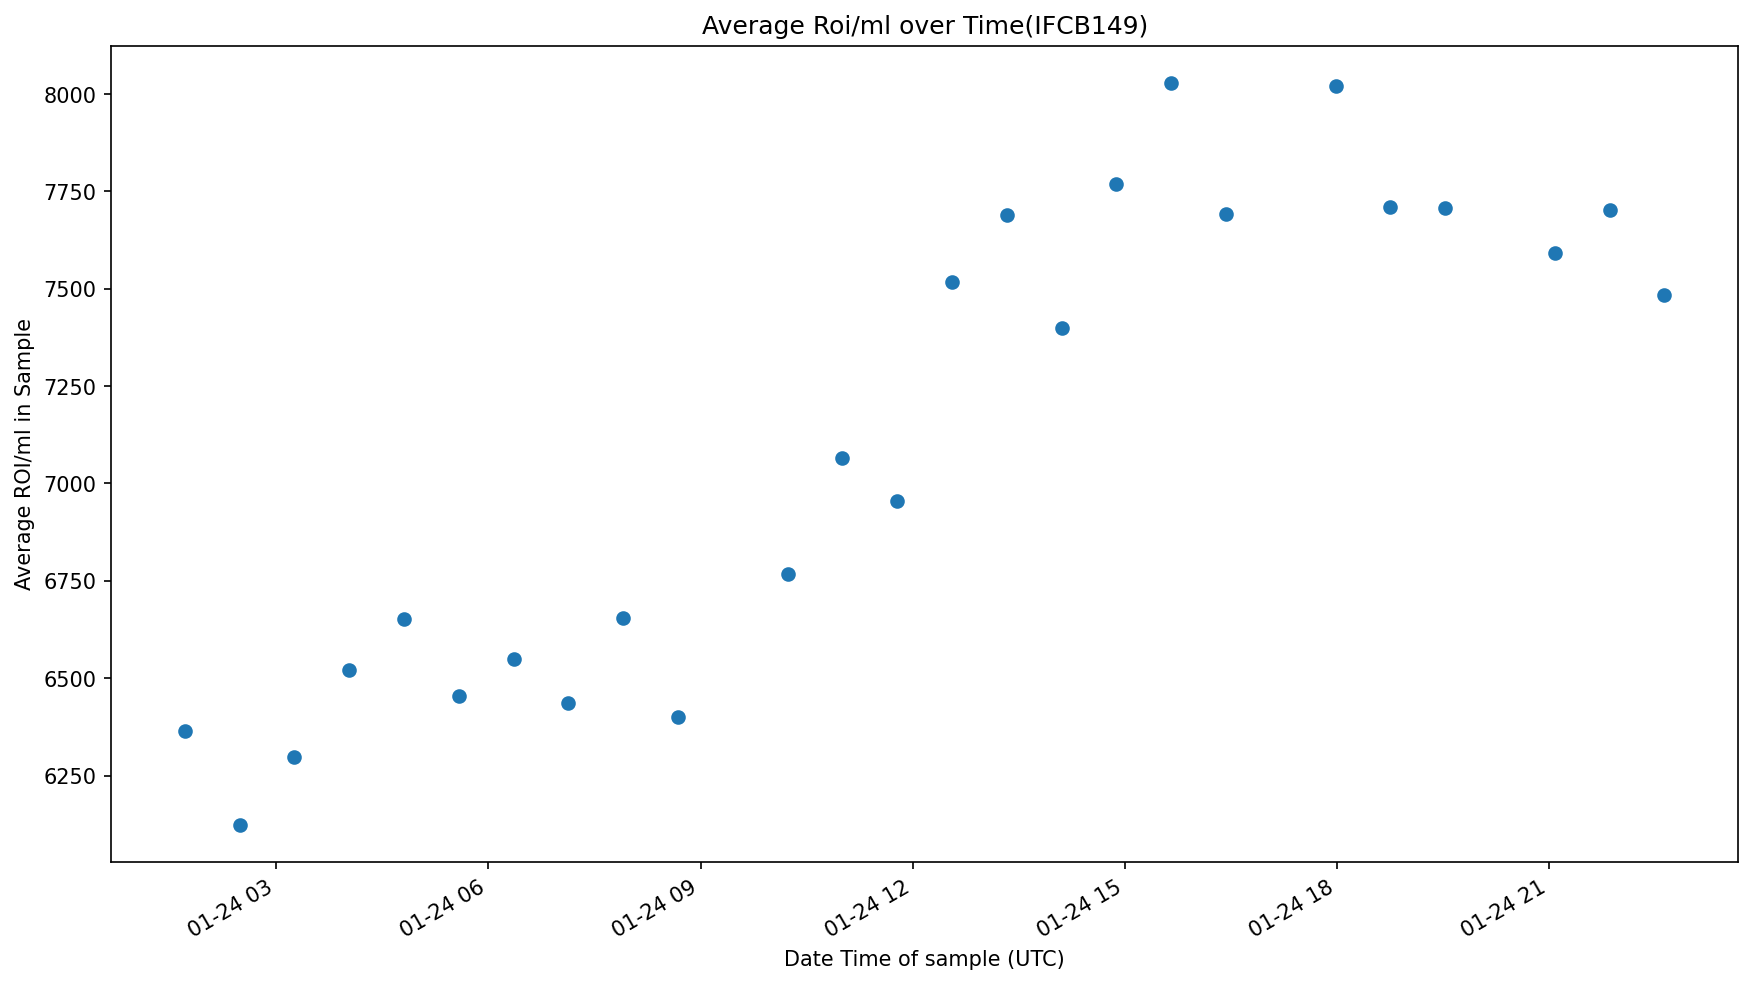

In [64]:
plt.figure(figsize=(14,8), dpi = 150)
plt.scatter(avg_df["datetime"],avg_df["avg_roi_ml"])
plt.xlabel("Date Time of sample (UTC)")
plt.ylabel("Average ROI/ml in Sample")
plt.title("Average Roi/ml over Time(IFCB149)")
plt.gcf().autofmt_xdate()
plt.savefig("../Figs/IFCB149LowVAvgRoioverTime.png")
plt.show()